# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

- `customerID` - id клиента,
- `BeginDate` – дата начала пользования услугами,
- `EndDate` – дата окончания пользования услугами,
- `Type` – тип оплаты: ежемесячный, годовой и тд,
- `PaperlessBilling` – безналичный расчет,
- `PaymentMethod` – способ оплаты,
- `MonthlyCharges` – ежемесячные траты на услуги,
- `TotalCharges` – всего потрачено денег на услуги
- `gender` - пол
- `Senior Citizen` – наличие пенсионного статуса по возрасту
- `Partner` – наличие супруга(и)
- `Dependents` – наличие иждивенцев
- `InternetService` - тип интернет подключения
- `OnlineSecurity` - онлайн безопасность
- `OnlineBackup` - онлайн резервная копия
- `DeviceProtection` - защита устройства
- `TechSupport` - техническая поддержка
- `StreamingTV` - Просмотр ТВ
- `StreamingMovies` - Просмотр кино
- `MultipleLines` – наличие возможности ведения параллельных линий во время звонка

*План работы*
1. Подготовить данные. Изменить типы данных.
2. Подготовка признаков. Составление единой таблицы со всеми данными для модели. Выделение целевого признака. Разделение на features и target со смешиванием данных.
4. Выбор моделей. Использование и обучение регрессионных моделей, например, CatBoostRegressor, LGBMRegressor и т.д.
5. Оценка эффективности моделей на тестовой выборке.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from catboost import CatBoostClassifier
from catboost import cv
from catboost import Pool
import catboost as cat


import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df_contract = pd.read_csv('contract.csv')
    df_personal = pd.read_csv('personal.csv')
    df_internet = pd.read_csv('internet.csv')
    df_phone = pd.read_csv('phone.csv')
except Exception as e:
    print(e)
    df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

df_contract.head(10)

[Errno 2] No such file or directory: 'contract.csv'


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [3]:
df_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [4]:
df_contract.duplicated().sum()

0

In [5]:
df_personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [6]:
df_personal.isna().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [7]:
df_personal.duplicated().sum()

0

In [8]:
df_internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [9]:
df_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [10]:
df_internet.duplicated().sum()

0

In [11]:
df_phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [12]:
df_phone.isna().sum()

customerID       0
MultipleLines    0
dtype: int64

In [13]:
df_phone.duplicated().sum()

0

In [14]:
df = df_contract.set_index('customerID').join(df_personal.set_index('customerID'))

In [15]:
df = df.join(df_internet.set_index('customerID'))

In [16]:
df = df.join(df_phone.set_index('customerID'))

In [17]:
df.isna().sum()

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [18]:
df['InternetService'].fillna('No',inplace = True)
df['OnlineSecurity'].fillna('No',inplace = True)
df['OnlineBackup'].fillna('No',inplace = True)
df['DeviceProtection'].fillna('No',inplace = True)
df['TechSupport'].fillna('No',inplace = True)
df['StreamingTV'].fillna('No',inplace = True)
df['StreamingMovies'].fillna('No',inplace = True)
df['MultipleLines'].fillna('No',inplace = True)

In [19]:
df.isna().sum()

BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null 

In [21]:
df['BeginDate']=pd.to_datetime(df['BeginDate'],format = '%Y-%m-%d')

<AxesSubplot:xlabel='BeginDate', ylabel='Density'>

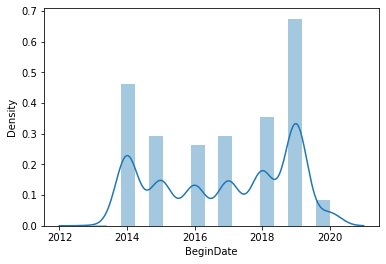

In [22]:
#Рост клиентов по годам начала пользования услугами
sns.distplot(df['BeginDate'].dt.year)

*рост новых клентов пришелся на 2014 и 2019 года*

In [23]:
begin_date=pd.to_datetime(df.loc[df['EndDate'] != 'No','BeginDate'],format = '%Y-%m-%d')
end_date=pd.to_datetime(df.loc[df['EndDate'] != 'No','EndDate'],format = '%Y-%m-%dT%H:%M:%S')

<AxesSubplot:xlabel='EndDate', ylabel='Density'>

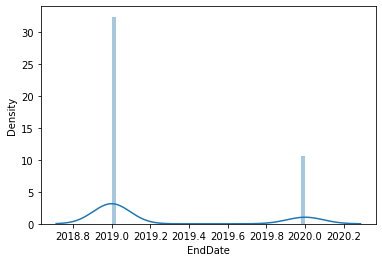

In [24]:
sns.distplot(end_date.dt.year)

*отток клиетов приходится на 2019 и небольшой отток произошел в 2020 году*

In [25]:
df_out = pd.concat([begin_date,end_date], axis=1)
df_out['Lasted'] = df_out['EndDate'] - df_out['BeginDate']
df_out

,BeginDate,EndDate,Lasted
customerID,,,
3668-QPYBK,2019-10-01,2019-12-01,61 days
9237-HQITU,2019-09-01,2019-11-01,61 days
9305-CDSKC,2019-03-01,2019-11-01,245 days
7892-POOKP,2017-07-01,2019-11-01,853 days
0280-XJGEX,2015-09-01,2019-10-01,1491 days
...,...,...,...
1699-HPSBG,2018-11-01,2019-11-01,365 days
8775-CEBBJ,2019-02-01,2019-11-01,273 days
6894-LFHLY,2019-10-01,2019-11-01,31 days


<AxesSubplot:xlabel='Lasted', ylabel='Density'>

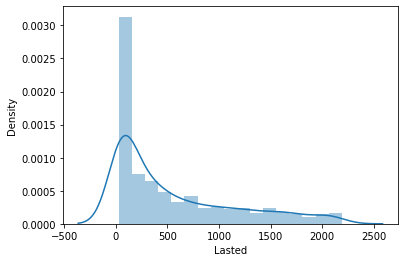

In [26]:
sns.distplot(df_out['Lasted'].dt.days)

<AxesSubplot:xlabel='Lasted', ylabel='Density'>

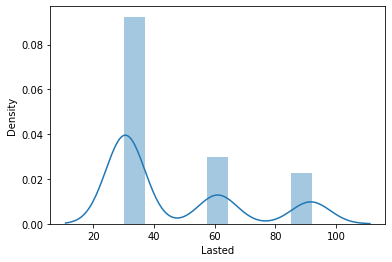

In [27]:
sns.distplot(df_out[df_out['Lasted'].dt.days<120]['Lasted'].dt.days)

*большое количетво людей пользуется услугами около месяца*

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

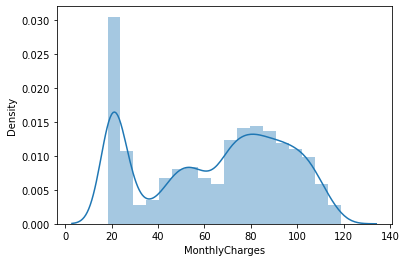

In [28]:
sns.distplot(df['MonthlyCharges'])

*основное количество пользователей ползуется тарифом с ценой около 20*

In [29]:
# проверили TotalCharges на числовые строки, чтобы отбросить просто пустые строки и не числовые строки 
for i in range(len(df['TotalCharges'])):
  partition = df['TotalCharges'][i].partition('.')
  if (partition[0].isdigit() and partition[1] == '.' and partition[2].isdigit()) \
  or (partition[0] == '' and partition[1] == '.' and partition[2].isdigit()) \
  or (partition[0].isdigit() and partition[1] == '.' and partition[2] == ''):
    df['TotalCharges'][i] = float(df['TotalCharges'][i])
  else: 
    df['TotalCharges'][i] = 'NaN'

In [30]:
Total_Charges = df[df['TotalCharges'] != 'NaN']['TotalCharges'].astype('float')

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

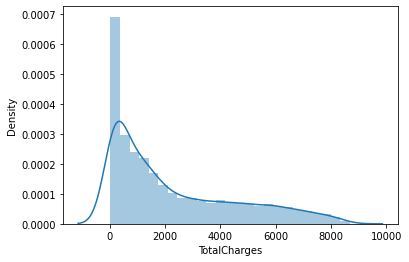

In [31]:
sns.distplot(Total_Charges)

In [32]:
print('Медиана Total Charges:',Total_Charges.median())
print('Среднее Total Charges:',Total_Charges.mean())

Медиана Total Charges: 1397.1
Среднее Total Charges: 2281.3374627310677


In [33]:
((df['BeginDate'][0] - df['BeginDate'][1])/np.timedelta64(1, 'M')) * df['MonthlyCharges'][1]

1880.4410768188259

In [34]:
# Для расчета общей оплаты берем месячную оплату и расчитываем количество месяцев до 2020-01-01, 
# для людей которые еще пользуются и для тех кто закончил берем разницу до финальной даты

final_date = df['BeginDate'][0]
df.loc[((df['TotalCharges'] == 'NaN') & (df['EndDate'] == 'No')),'TotalCharges'] = \
((final_date - df['BeginDate'])/np.timedelta64(1, 'M')) * df['MonthlyCharges']


In [35]:
df.loc[((df['TotalCharges'] == 'NaN') & (df['EndDate'] != 'No')),'TotalCharges'] = \
((pd.to_datetime(df[df['EndDate'] != 'No']['EndDate']) - df['BeginDate'])/np.timedelta64(1, 'M')) * df['MonthlyCharges']

In [36]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], downcast='float')

OnlineSecurity 
 No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


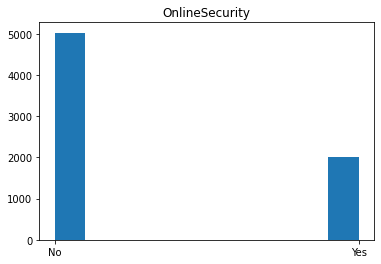

OnlineBackup 
 No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


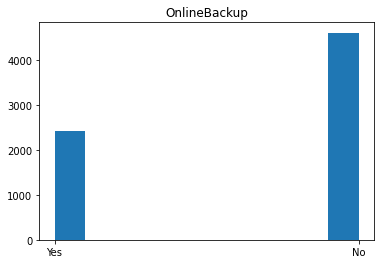

DeviceProtection 
 No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


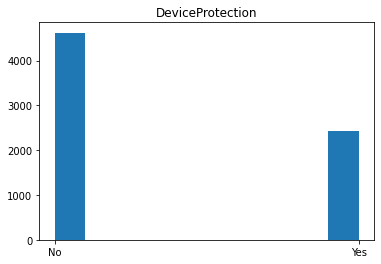

TechSupport 
 No     4999
Yes    2044
Name: TechSupport, dtype: int64


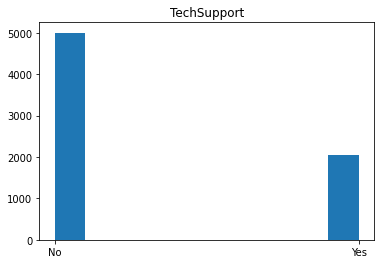

StreamingTV 
 No     4336
Yes    2707
Name: StreamingTV, dtype: int64


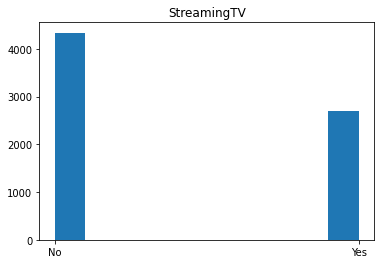

StreamingMovies 
 No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


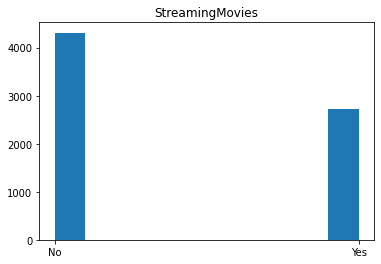

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64


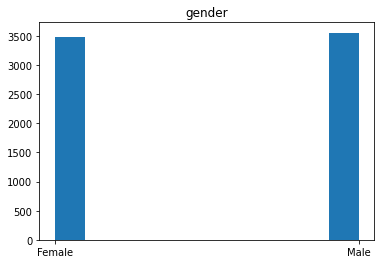

SeniorCitizen 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


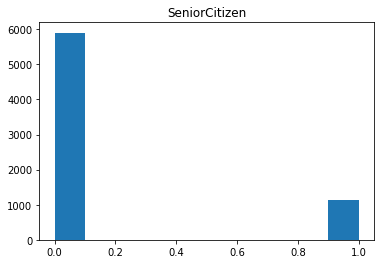

Partner 
 No     3641
Yes    3402
Name: Partner, dtype: int64


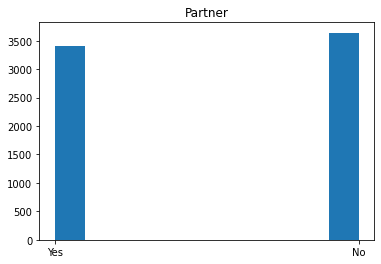

Dependents 
 No     4933
Yes    2110
Name: Dependents, dtype: int64


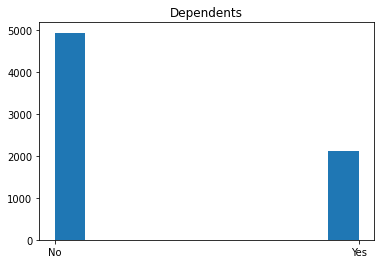

MultipleLines 
 No     4072
Yes    2971
Name: MultipleLines, dtype: int64


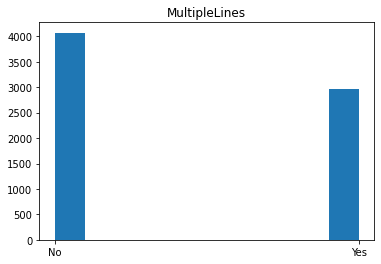

PaperlessBilling 
 Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


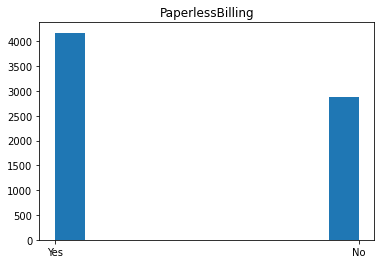

In [37]:
binary_col = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',\
              'StreamingMovies','gender','SeniorCitizen','Partner','Dependents','MultipleLines','PaperlessBilling']
for i in binary_col:
  print(i,'\n',df[i].value_counts())
  plt.hist(df[i])
  plt.title(i)
  plt.show() 

*Все переменные примерно сбалансированы между собой без видимого дисбаланса за исключением зависимых людей финансово и людей в возрасте*

*Также можно явно выделить ,что самая популярные услуги это Онлайн Безопасность и Техническая поддержка, а также большенство предпочитает получать чеки онлайн. Самая непопулярная услуга это мультилинии , но это понятно , ведь с ростом интернета доп услуги телефонии уже не так востребованы и нужны*

In [38]:
#string Yes No переводим в 1 и 0 соответсвенно
df['MultipleLines'] = pd.Series(np.where(df['MultipleLines'].values == 'Yes', 1, 0),df.index)
df['Dependents'] = pd.Series(np.where(df['Dependents'].values == 'Yes', 1, 0),df.index)
df['Partner'] = pd.Series(np.where(df['Partner'].values == 'Yes', 1, 0),df.index)
df['gender'] = pd.Series(np.where(df['gender'].values == 'Female', 1, 0),df.index)
df['StreamingMovies'] = pd.Series(np.where(df['StreamingMovies'].values == 'Yes', 1, 0),df.index)
df['StreamingTV'] = pd.Series(np.where(df['StreamingTV'].values == 'Yes', 1, 0),df.index)
df['TechSupport'] = pd.Series(np.where(df['TechSupport'].values == 'Yes', 1, 0),df.index)
df['DeviceProtection'] = pd.Series(np.where(df['DeviceProtection'].values == 'Yes', 1, 0),df.index)
df['OnlineBackup'] = pd.Series(np.where(df['OnlineBackup'].values == 'Yes', 1, 0),df.index)
df['OnlineSecurity'] = pd.Series(np.where(df['OnlineSecurity'].values == 'Yes', 1, 0),df.index)
df['PaperlessBilling'] = pd.Series(np.where(df['PaperlessBilling'].values == 'Yes',1,0),df.index)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   object        
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   int64         
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float32       
 7   gender            7043 non-null   int64         
 8   SeniorCitizen     7043 non-null   int64         
 9   Partner           7043 non-null   int64         
 10  Dependents        7043 non-null   int64         
 11  InternetService   7043 non-null   object        
 12  OnlineSecurity    7043 non-null   int64         
 13  OnlineBackup      7043 non-null   int64         
 14  DeviceProtecti

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


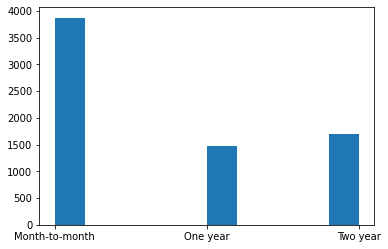

In [40]:
print(df['Type'].value_counts())
plt.hist(df['Type']);

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


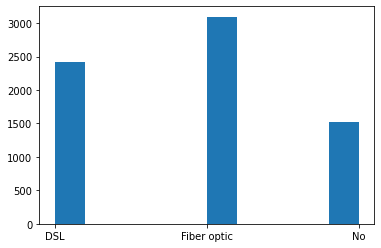

In [41]:
print(df['InternetService'].value_counts())
plt.hist(df['InternetService']);

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


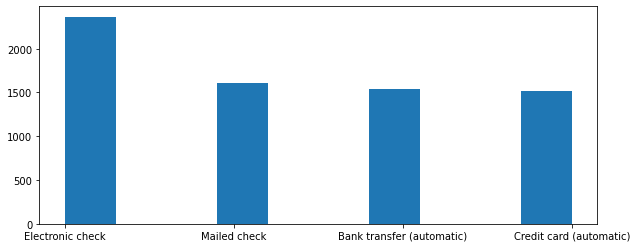

In [42]:
print(df['PaymentMethod'].value_counts())
plt.figure(figsize=(10,4))
plt.hist(df['PaymentMethod']);

In [43]:
#OHE encoding
df = pd.get_dummies(df, columns = ['Type', 'InternetService','PaymentMethod'], drop_first = True)

In [44]:
# target из EndDate
df['quit'] = pd.Series(np.where(df['EndDate'].values == 'No', 0, 1),df.index)

In [45]:
last_dat = df[df['EndDate'] != 'No']['EndDate'].sort_values().tail(1)

In [46]:
final_date

Timestamp('2020-01-01 00:00:00')

In [47]:
df.loc[df['EndDate'] == 'No','EndDate'] = final_date

In [48]:
df['duration'] = (pd.to_datetime(df['EndDate']) - df['BeginDate']).dt.days

In [49]:
df['quit'].value_counts()

0    5174
1    1869
Name: quit, dtype: int64

*Заметили дисбаланс , поэтому будем пробовать upsampling в случае плохой метрики*

<AxesSubplot:xlabel='quit', ylabel='Density'>

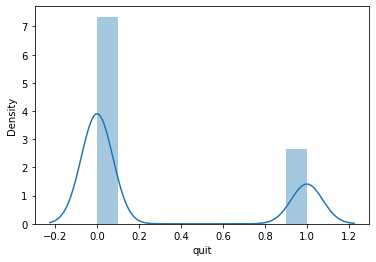

In [50]:
sns.distplot(df['quit'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   BeginDate                              7043 non-null   datetime64[ns]
 1   EndDate                                7043 non-null   object        
 2   PaperlessBilling                       7043 non-null   int64         
 3   MonthlyCharges                         7043 non-null   float64       
 4   TotalCharges                           7043 non-null   float32       
 5   gender                                 7043 non-null   int64         
 6   SeniorCitizen                          7043 non-null   int64         
 7   Partner                                7043 non-null   int64         
 8   Dependents                             7043 non-null   int64         
 9   OnlineSecurity                         7043 non-null 

In [52]:
#убираем ,чтобы модель не смогла обмануться по features 
df.drop('EndDate', axis = 1, inplace = True)
df.drop('BeginDate', axis = 1, inplace = True)

In [53]:
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 42)

In [54]:
features_train = train_df.drop('quit', axis = 1)
features_test = test_df.drop('quit', axis = 1)

target_train = train_df['quit']
target_test = test_df['quit']

#### Random Forest Classifier model

In [55]:
rfc_model = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

rfc_model.fit(features_train, target_train)

predict_forest_proba = rfc_model.predict_proba(features_test)[:,1]

roc_auc_score(target_test, predict_forest_proba)

0.875044431313152

Feature importances:
 1. feature 'duration' (0.2142)
 2. feature 'TotalCharges' (0.1748)
 3. feature 'MonthlyCharges' (0.1606)
 4. feature 'Type_Two year' (0.0593)
 5. feature 'InternetService_Fiber optic' (0.0462)
 6. feature 'PaymentMethod_Electronic check' (0.0374)
 7. feature 'Type_One year' (0.0289)
 8. feature 'OnlineSecurity' (0.0240)
 9. feature 'gender' (0.0231)
10. feature 'PaperlessBilling' (0.0225)
11. feature 'InternetService_No' (0.0219)
12. feature 'Partner' (0.0206)
13. feature 'OnlineBackup' (0.0204)
14. feature 'TechSupport' (0.0190)
15. feature 'Dependents' (0.0181)
16. feature 'MultipleLines' (0.0180)
17. feature 'SeniorCitizen' (0.0170)
18. feature 'DeviceProtection' (0.0167)
19. feature 'StreamingMovies' (0.0164)
20. feature 'StreamingTV' (0.0158)
21. feature 'PaymentMethod_Credit card (automatic)' (0.0134)
22. feature 'PaymentMethod_Mailed check' (0.0117)


<BarContainer object of 22 artists>

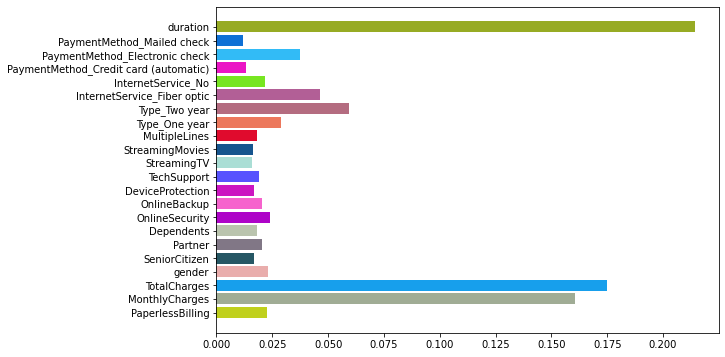

In [56]:
plt.figure(figsize=(9,6))
feature_import = rfc_model.feature_importances_
col_names = features_train.columns
indices = np.argsort(feature_import)[::-1]
print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, col_names[idx], feature_import[idx]))
color_rectangle = np.random.rand(22, 3)    
plt.barh(col_names,feature_import,color = color_rectangle)


Для случайного леса видим , что по графику относительно всех остальных отличаются большей значимостью 10 features :

 1. feature 'duration' (0.2142)
 2. feature 'TotalCharges' (0.1748)
 3. feature 'MonthlyCharges' (0.1606)
 4. feature 'Type_Two year' (0.0593)
 5. feature 'InternetService_Fiber optic' (0.0462)
 6. feature 'PaymentMethod_Electronic check' (0.0374)
 7. feature 'Type_One year' (0.0289)
 8. feature 'OnlineSecurity' (0.0240)
 9. feature 'gender' (0.0231)
 10. feature 'PaperlessBilling' (0.0225)

Остальные уже не так сильно влияют на конечную переменную

In [57]:
rfc_X_train = features_train[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                              'PaymentMethod_Electronic check','Type_One year','OnlineSecurity','gender','PaperlessBilling']]

In [58]:
rfc_X_test = features_test[['duration','MonthlyCharges','Type_Two year','InternetService_Fiber optic',\
                             'PaymentMethod_Electronic check','Type_One year','OnlineSecurity','gender','PaperlessBilling']]

In [59]:
rfc_X_train.corr()

,duration,MonthlyCharges,Type_Two year,InternetService_Fiber optic,PaymentMethod_Electronic check,Type_One year,OnlineSecurity,gender,PaperlessBilling
duration,1.000000,0.255196,0.556983,0.028186,-0.198081,0.195872,0.323482,-0.003605,0.005131
MonthlyCharges,0.255196,1.000000,-0.064528,0.784431,0.273973,-0.004445,0.303200,0.022098,0.361758
Type_Two year,0.556983,-0.064528,1.000000,-0.207933,-0.274685,-0.293496,0.191845,0.004981,-0.155598
InternetService_Fiber optic,0.028186,0.784431,-0.207933,1.000000,0.333991,-0.081352,-0.028235,0.012709,0.334210
PaymentMethod_Electronic check,-0.198081,0.273973,-0.274685,0.333991,1.000000,-0.104785,-0.097504,-0.008552,0.212748
Type_One year,0.195872,-0.004445,-0.293496,-0.081352,-0.104785,1.000000,0.087182,-0.009798,-0.055460
OnlineSecurity,0.323482,0.303200,0.191845,-0.028235,-0.097504,0.087182,1.000000,0.025977,0.012713
gender,-0.003605,0.022098,0.004981,0.012709,-0.008552,-0.009798,0.025977,1.000000,0.015118
PaperlessBilling,0.005131,0.361758,-0.155598,0.334210,0.212748,-0.055460,0.012713,0.015118,1.000000


In [60]:
rfc = GridSearchCV(RandomForestClassifier(criterion = 'entropy', class_weight='balanced'),{
    'max_depth': range(3,15,3),
    'n_estimators': range(10,100, 10),
    'min_samples_split' : range(4,28,4),
    'min_samples_leaf' : range(3,13,2)
}, cv = 5, scoring = 'roc_auc')

In [ ]:
rfc.fit(rfc_X_train,target_train)

In [ ]:
rfc.best_params_

In [ ]:
rfc.best_score_

In [62]:
rfc_model = RandomForestClassifier(class_weight = 'balanced',criterion = 'entropy', max_depth=9, min_samples_leaf=5, min_samples_split=20, n_estimators = 70, random_state = 42)

rfc_model.fit(rfc_X_train, target_train)

predict_forest_proba = rfc_model.predict_proba(rfc_X_test)[:,1]

roc_auc_score(target_test, predict_forest_proba)

0.8728239976635355

In [63]:
predict_forest = rfc_model.predict(rfc_X_test)
accuracy_score(target_test, predict_forest)

0.7903454803596782

#### CatBoostClassifier

In [64]:
train_dataset = Pool(features_train, target_train)
test_dataset = Pool(features_test, target_test)

In [65]:
modelCat = CatBoostClassifier(loss_function = 'CrossEntropy',learning_rate = 0.03, random_state = 42)
modelCat.fit(train_dataset, eval_set = test_dataset, plot = True, verbose = False)
cat_predict_proba = modelCat.predict_proba(features_test)[:,1]
roc_auc_score(target_test, cat_predict_proba)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.9212337528554901

,Feature Id,Importances
0,duration,32.691056
1,TotalCharges,18.685712
2,MonthlyCharges,12.897827
3,Type_Two year,6.054067
4,InternetService_Fiber optic,3.352305
5,Type_One year,2.783755
6,PaymentMethod_Electronic check,2.312863
7,PaperlessBilling,2.288292
8,InternetService_No,2.193780
9,MultipleLines,1.764810


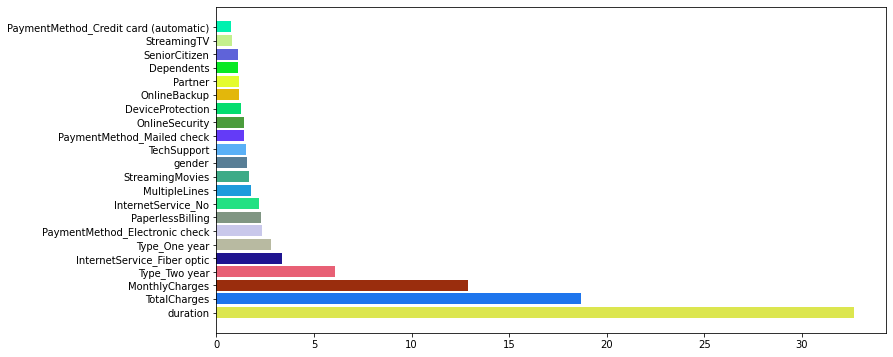

In [66]:
#feature Importance
plt.figure(figsize=(12,6))
feature_import = modelCat.get_feature_importance(train_dataset, prettified = True)
color_rectangle = np.random.rand(22, 3)    
plt.barh(feature_import['Feature Id'],feature_import['Importances'],color = color_rectangle)
feature_import

Vожно выделить топ 11 значимых features,т.к. разница в важности между 10 и 11 не такая большая :

1. duration	32.691056
2.	TotalCharges	18.685712 (убран из-за мультиколлениарности)
3.	MonthlyCharges	12.897827
4.	Type_Two year	6.054067
5.	InternetService_Fiber optic	3.352305
6.	Type_One year	2.783755
7.	PaymentMethod_Electronic check	2.312863
8.	PaperlessBilling	2.288292
9.	InternetService_No	2.193780
10.	MultipleLines	1.764810
11.	StreamingMovies	1.673452

Остальные будем считать менее важны на конечную переменную

In [67]:
cat_X_train = features_train[['duration','Type_Two year','InternetService_Fiber optic',\
                              'Type_One year','PaymentMethod_Electronic check','PaperlessBilling','MultipleLines','StreamingMovies','InternetService_No']]
cat_X_test = features_test[['duration','Type_Two year','InternetService_Fiber optic',\
                              'Type_One year','PaymentMethod_Electronic check','PaperlessBilling','MultipleLines','StreamingMovies','InternetService_No']]
train_dataset = Pool(cat_X_train, target_train)
test_dataset = Pool(cat_X_test, target_test)

In [ ]:
modelCat = CatBoostClassifier( random_state = 42)
gsearchCat = GridSearchCV(modelCat,{
    'iterations': [400,500,600,1000],
    'learning_rate' : [0.03],
    'depth' : range(3,15,3),
    'verbose' : [False]
}, cv = 5, scoring = 'roc_auc')

In [522]:
gsearchCat.fit(cat_X_train,target_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000000001A838A00>,
             param_grid={'depth': range(3, 15, 3),
                         'iterations': [400, 500, 600, 1000],
                         'learning_rate': [0.03], 'verbose': [False]},
             scoring='roc_auc')

In [523]:
gsearchCat.best_params_

{'depth': 3, 'iterations': 1000, 'learning_rate': 0.03, 'verbose': False}

In [524]:
gsearchCat.best_score_

0.8858661766502207

In [68]:
modelCat = CatBoostClassifier(loss_function = 'CrossEntropy',iterations = 1000, depth = 3,learning_rate = 0.03, random_state = 42)

In [69]:
modelCat.fit(train_dataset, eval_set = test_dataset, verbose = False)

In [70]:
cat_predict_proba = modelCat.predict_proba(cat_X_test)[:,1]

In [71]:
roc_auc_score(target_test, cat_predict_proba)

0.8989603638726447

In [72]:
catPrediction = modelCat.predict(cat_X_test)
accuracy_score(target_test,catPrediction)

0.8438239469947941

В итоге получили лучшую модель: CatBoost с roc_auc = 0.89   и точностью 84%

## Вывод:
- загрузили данные, сделали выводы
- проанализировали данные, выяснили, что большое кол-во пользователей пришло и ушло в один год, видимо ищут более выгодные условия для нового пользователя
- перевели данные для формата модели и сделали кодировку
- использовали `GridSearchCV`; потребность разделения на обучение , тест и валидацию отпала
- обучили модели `Random Forest Classifier` и более ресурсоемкую модель `Cat Boost Classifier`, т.к она показала наиболее луччшие результаты
- настроили гиперпараметры на ряду с кросс-валидацией

**Плюсы:**

- создали дополнительные признаки : `duration (длительность контракта на 2020-01-01)` и выделили `target` из `EndDate`
- убрали признаки с помощью которых модель могла обмануться , а также в последующем после feature_importance выделили основные признаки для алгоритма
- решили проблемы мультиколлинеарности с помощью матрицы корреляции

***Лучшая модель - `CatBoostClassifier`***:

*loss_function = 'CrossEntropy',iterations = 1000, depth = 3,learning_rate = 0.03*

гиперпараметры:
`roc_auc = 0.8989603638726447`
`accuracy = 0.8438239469947941`

